<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Hidden Layer Deep Network: Sigmoid, Tanh and Relu Activations Functions MNIST Dataset</h1>


<h2>Table of Contents</h2>
Objective: Testing Sigmoid, Tanh and Relu activation functions on the MNIST dataset with 2 hidden Layers.</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define Several Neural Network, Criterion function, Optimizer</a></li>
    <li><a href="#Test">Test Sigmoid ,Tanh and Relu </a></li>
    <li><a href="#Result">Analyse Results</a></li>
</ul>

<hr>


We'll need the following libraries


In [1]:
import matplotlib.pylab as plt
import numpy as np

# Using the following line code to install the torchvision library
# !mamba install -y torchvision

# !pip install torchvision==0.9.1 torch==1.8.1
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F


torch.manual_seed(1)

<h2 id="Model">Neural Network Module and Training Function</h2> 


Define the neural network module or class, with two hidden Layers 


<img src="https://ibm.box.com/shared/static/5wtclahun0f70qlwkn2kxzh3amnbq4zg.png" width="200" alt="Neural Network Model">


In [2]:
# Create the model class using sigmoid as activation function

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

In [3]:
# Create the model class using Tanh as activation function

class NetTanh(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        x = self.linear3(x)
        return x

In [4]:
# Create the model class using Relu as activation function

class NetRelu(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [5]:
# Train model

def train(model, criterion, train_loader, validation_loader,
          optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}
    
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
    
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

<h2 id="Makeup_Data">Make Some Data</h2> 


In [6]:
# Create training dataset

train_dataset = dsets.MNIST(root = './data', train = True, 
                            download = True, transform = transforms.ToTensor())

# Create validation dataset

validation_dataset = dsets.MNIST(root = './data', train = False, 
                                 download = True, transform = transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
# Create criterion function

criterion = nn.CrossEntropyLoss()

Create the training-data loader and the validation-data loader object 


In [8]:
# Create the training data loader and validation data loader object

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = 2000, shuffle = True)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset,
                                                batch_size = 5000, shuffle = False)

<h2 id="Train">Define Neural Network, Criterion function, Optimizer and Train the Model</h2> 


In [9]:
# Set the parameters for the model

input_dim = 28 * 28
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10

The epoch number in the video is 35. You can try 10 for now. If you try 35, it may take a long time.


In [10]:
# Set the number of iterations

cust_epochs = 10

<h2 id="Test">Test Sigmoid ,Tanh and Relu</h2> 


In [11]:
# Train the model with sigmoid function

learning_rate = 0.01
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
training_results = train(model, criterion,
                         train_loader, validation_loader,
                         optimizer, epochs = cust_epochs)

In [12]:
# Train the model with tanh function

learning_rate = 0.01
model_Tanh = NetTanh(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr = learning_rate)
training_results_tanch = train(model_Tanh, criterion,
                               train_loader, validation_loader,
                               optimizer, epochs = cust_epochs)

In [13]:
# Train the model with relu function

learning_rate = 0.01
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr = learning_rate)
training_results_relu = train(modelRelu, criterion,
                              train_loader, validation_loader,
                              optimizer, epochs = cust_epochs)

<h2 id="Result">Analyze Results</h2> 


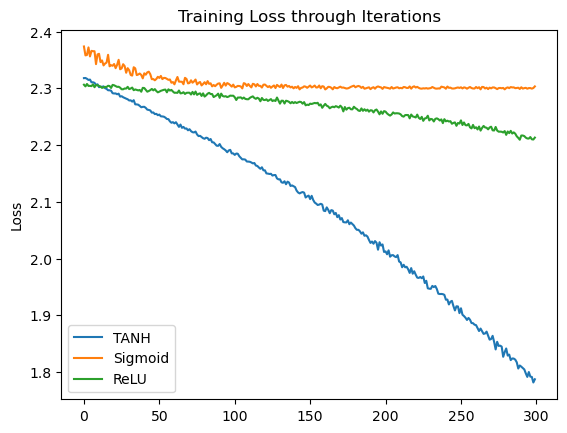

In [15]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label = 'TANH')
plt.plot(training_results['training_loss'], label = 'Sigmoid')
plt.plot(training_results_relu['training_loss'], label = 'ReLU')
plt.ylabel('Loss')
plt.title('Training Loss through Iterations')
plt.legend()
plt.show()

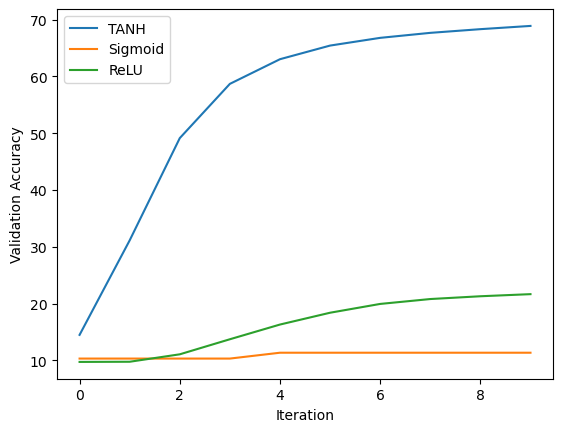

In [16]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label = 'TANH')
plt.plot(training_results['validation_accuracy'], label = 'Sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'ReLU') 
plt.ylabel('Validation Accuracy')
plt.xlabel('Iteration')
plt.legend()
plt.show()